In [4]:
import numpy as np
import cv2
import Image_Augment
import Augmentor
from glob import glob

In [63]:
image_path = r'D:\Datasets\village\camera'
image_augment = Image_Augment.DataAugmentation()   

In [85]:
p = Augmentor.Pipeline(image_path)

Initialised with 200 image(s) found.
Output directory set to D:\Datasets\village\camera\output.

In [86]:
# crop
# p.crop_random(probability=0.5, percentage_area=0.9)
# Symmetry
p.flip_left_right(probability=0.8)
p.flip_top_bottom(probability=0.8)
# rotation
p.rotate90(probability=0.2)
# scale
p.zoom(probability=0.8, min_factor=1.1, max_factor = 2)
# noise
# p.gaussian_distortion(probability=0.5, grid_width=5, grid_height=5, magnitude=10. corner=1, method='gaussion')
# Obstruction
# p.random_erasing(probability=0.3, rectangle_area=0.7)
# Blur

In [87]:
p.status()


Operations: 4
	0: Flip (probability=0.8 top_bottom_left_right=LEFT_RIGHT )
	1: Flip (probability=0.8 top_bottom_left_right=TOP_BOTTOM )
	2: Rotate 90 (probability=0.2 rotation=90 )
	3: Zoom (probability=0.8 min_factor=1.1 max_factor=2 )
Images: 200
Classes: 1
	Class index: 0 Class label: camera 
Dimensions: 7
	Width: 640 Height: 410
	Width: 2880 Height: 2160
	Width: 3264 Height: 2448
	Width: 3024 Height: 4032
	Width: 2160 Height: 2880
	Width: 640 Height: 360
	Width: 760 Height: 500
Formats: 1
	 JPEG

You can remove operations using the appropriate index and the remove_operation(index) function.


In [88]:
p.status()

Operations: 4
	0: Flip (probability=0.8 top_bottom_left_right=LEFT_RIGHT )
	1: Flip (probability=0.8 top_bottom_left_right=TOP_BOTTOM )
	2: Rotate 90 (probability=0.2 rotation=90 )
	3: Zoom (probability=0.8 min_factor=1.1 max_factor=2 )
Images: 200
Classes: 1
	Class index: 0 Class label: camera 
Dimensions: 7
	Width: 640 Height: 410
	Width: 2880 Height: 2160
	Width: 3264 Height: 2448
	Width: 3024 Height: 4032
	Width: 2160 Height: 2880
	Width: 640 Height: 360
	Width: 760 Height: 500
Formats: 1
	 JPEG

You can remove operations using the appropriate index and the remove_operation(index) function.


In [90]:
p.sample(400)

Processing <PIL.Image.Image image mode=RGB size=760x500 at 0x2763A054160>: 100%|██████████| 400/400 [00:03<00:00, 130.02 Samples/s]


In [ ]:
img = cv2.imread('./pic/46E40F85-5DD3-435E-A258-898E88D0300C.JPG')


In [ ]:
img_ = cv2.GaussianBlur(img, (21, 21), 100)

In [ ]:
cv2.imwrite('./pic/output/image_guassian.jpg', img_)

In [ ]:
import random
def gasuss_noise(image, mean=0, var=0.001):
  ''' 
    添加高斯噪声
    mean : 均值 
    var : 方差
  '''
  image = np.array(image/255, dtype=float)
  noise = np.random.normal(mean, var ** 0.5, image.shape)
  out = image + noise
  if out.min() < 0:
    low_clip = -1.
  else:
    low_clip = 0.
  out = np.clip(out, low_clip, 1.0)
  out = np.uint8(out*255)
  #cv.imshow("gasuss", out)
  return out

def sp_noise(image,prob):
  '''
  添加椒盐噪声
  prob:噪声比例 
  '''
  output = np.zeros(image.shape,np.uint8)
  thres = 1 - prob 
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      rdn = random.random()
      if rdn < prob:
        output[i][j] = 0
      elif rdn > thres:
        output[i][j] = 255
      else:
        output[i][j] = image[i][j]
  return output

In [72]:
img_noise = sp_noise(img, 0.2)

In [73]:
cv2.imwrite('./pic/output/image_noise.jpg', img_noise)

True

In [74]:
img_src = './pic/46E40F85-5DD3-435E-A258-898E88D0300C.JPG'
img_noise = './pic/output/image_noise.jpg'
img_guassian = './pic/output/image_guassian.jpg'
img_obs = './pic/output/pic_original_46E40F85-5DD3-435E-A258-898E88D0300C.JPG_c3623fba-8537-4269-8243-30a6dd18d446.JPG'
img_flip = './pic/output/pic_original_46E40F85-5DD3-435E-A258-898E88D0300C.JPG_99b21051-1494-4e70-a30c-3e4b58db4f22.JPG'
img_rorate = './pic/output/pic_original_46E40F85-5DD3-435E-A258-898E88D0300C.JPG_d48da3ff-1d70-4dee-b60e-76c7fc8ba48d.JPG'
img_crop = './pic/output/pic_original_46E40F85-5DD3-435E-A258-898E88D0300C.JPG_8a6439ce-20e5-4477-80cd-2ceb574a128a.JPG'


In [75]:
import matplotlib.pyplot as plt
from PIL import Image

img_src = Image.open('./pic/46E40F85-5DD3-435E-A258-898E88D0300C.JPG')
img_noise = Image.open('./pic/output/image_noise.jpg')
img_guassian = Image.open('./pic/output/image_guassian.jpg')
img_obs = Image.open('./pic/output/pic_original_46E40F85-5DD3-435E-A258-898E88D0300C.JPG_c3623fba-8537-4269-8243-30a6dd18d446.JPG')
img_flip = Image.open('./pic/output/pic_original_46E40F85-5DD3-435E-A258-898E88D0300C.JPG_99b21051-1494-4e70-a30c-3e4b58db4f22.JPG')
img_rorate = Image.open('./pic/output/pic_original_46E40F85-5DD3-435E-A258-898E88D0300C.JPG_d48da3ff-1d70-4dee-b60e-76c7fc8ba48d.JPG')
img_crop = Image.open('./pic/output/pic_original_46E40F85-5DD3-435E-A258-898E88D0300C.JPG_8a6439ce-20e5-4477-80cd-2ceb574a128a.JPG')

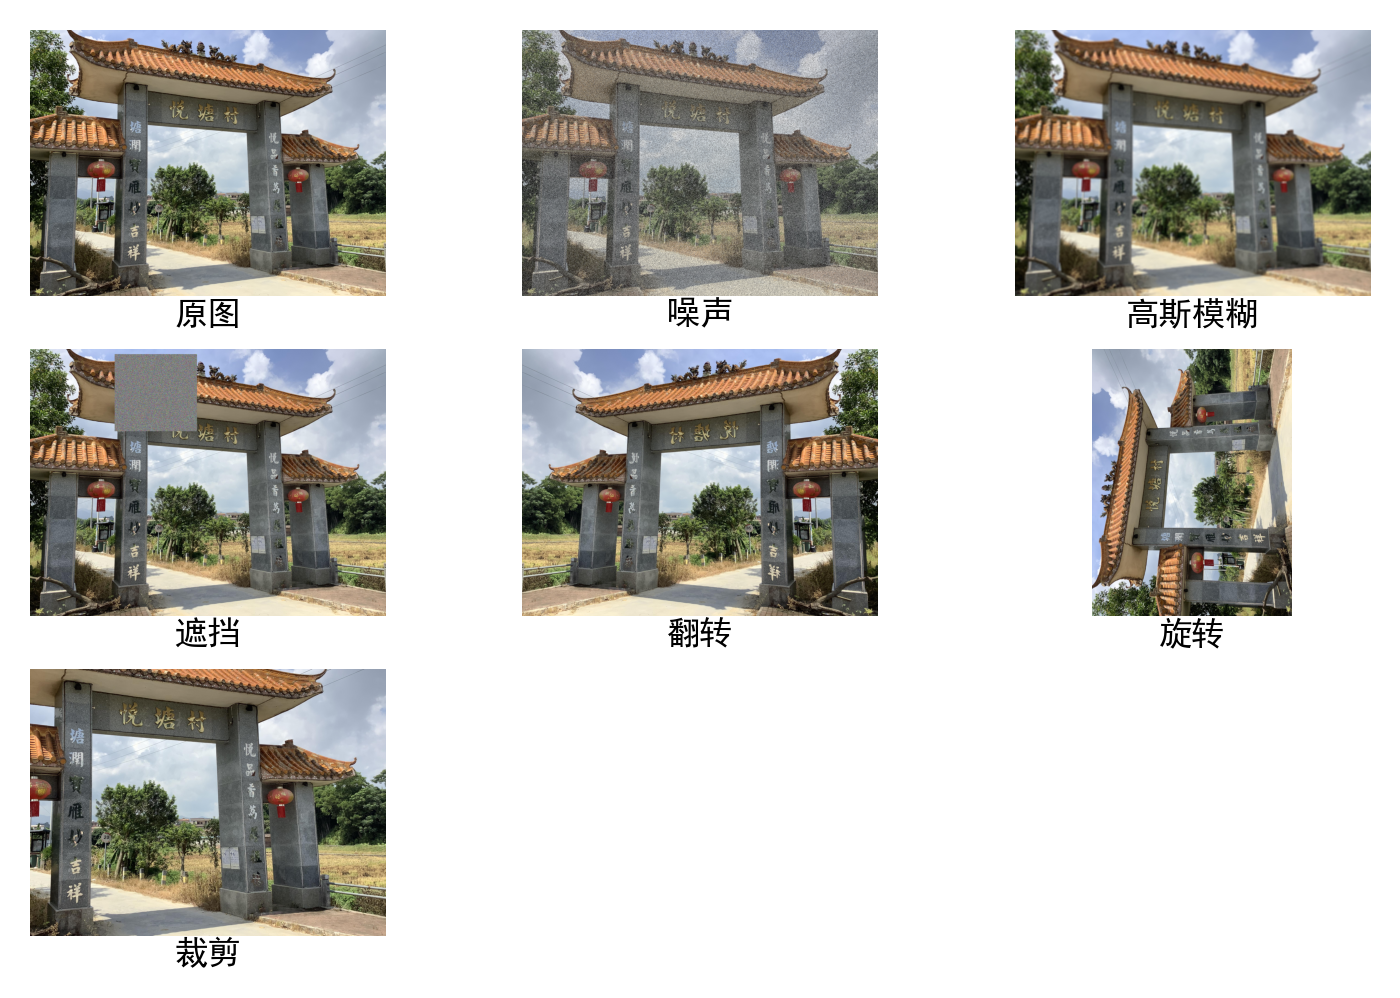

In [76]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=300)

plt.subplot(3,3,1)
plt.imshow(img_src)
plt.title('原图', fontdict={'weight':'normal','size': 8}, y=-0.2)
plt.axis('off') # 不显示坐标轴

plt.subplot(3, 3, 2)
plt.imshow(img_noise)
plt.title('噪声', fontdict={'weight':'normal','size': 8}, y=-0.2)
plt.axis('off') # 不显示坐标轴

plt.subplot(3, 3, 3)
plt.imshow(img_guassian)
plt.title('高斯模糊',fontdict={'weight':'normal','size': 8}, y=-0.2)
plt.axis('off') # 不显示坐标轴

plt.subplot(3, 3, 4)
plt.imshow(img_obs)
plt.title('遮挡',fontdict={'weight':'normal','size': 8}, y=-0.2)
plt.axis('off') # 不显示坐标轴

plt.subplot(3, 3, 5)
plt.imshow(img_flip)
plt.title('翻转',fontdict={'weight':'normal','size': 8}, y=-0.2)
plt.axis('off') # 不显示坐标轴

plt.subplot(3, 3, 6)
plt.imshow(img_rorate)
plt.title('旋转',fontdict={'weight':'normal','size': 8}, y=-0.2)
plt.axis('off') # 不显示坐标轴

plt.subplot(3, 3, 7)
plt.imshow(img_crop)
plt.title('裁剪',fontdict={'weight':'normal','size': 8}, y=-0.2)
plt.axis('off') # 不显示坐标轴

plt.savefig('result.png',bbox_inches='tight')
plt.show()

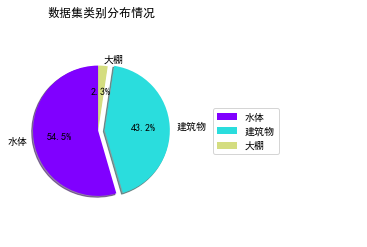

In [111]:
# 画饼图
import matplotlib.pyplot as plt
from  matplotlib import cm
from matplotlib.patches import ConnectionPatch

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '水体', '建筑物', '大棚'
sizes = [418, 331, 18]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = cm.rainbow(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks

fig1, axes = plt.subplots(ncols=2)
ax1, ax2 = axes.ravel()

patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.01f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('数据集类别分布情况', loc='center')
# 设置图例
ax2.axis('off')
ax2.legend(patches, labels, loc='center left')
plt.savefig('dataset.jpg', bbox_inches ='tight')
plt.show()

AttributeError: 'Shadow' object has no attribute 'theta1'

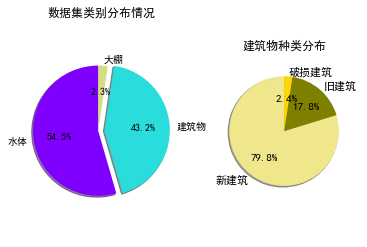

In [120]:
# 画饼图
import matplotlib.pyplot as plt
from  matplotlib import cm
from matplotlib.patches import ConnectionPatch

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '水体', '建筑物', '大棚'
sizes = [418, 331, 18]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = cm.rainbow(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks

fig1, axes = plt.subplots(ncols=2)
ax1, ax2 = axes.ravel()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.01f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('数据集类别分布情况', loc='center')
# 设置图例
labels = '新建筑','旧建筑','破损建筑'
sizes = [264, 59, 8]
ax2.pie(x=sizes,
        colors=['khaki', 'olive', 'gold'],
        autopct='%1.1f%%',
        startangle=90,
        labels=labels,
        radius=0.9,
        shadow=True,
        textprops={'color': 'k',
                   'fontsize': 11,
                  },
       )
ax2.set_title('建筑物种类分布', loc='center')
# # 用 ConnectionPatch 画出两个饼图的间连线
# ## 饼图边缘的数据
# theta1 = ax1.patches[-1].theta1
# theta2 = ax1.patches[-1].theta2
# center = ax1.patches[-1].center
# r = ax1.patches[-1].r

# width=0.2
# # 上边缘的连线
# x = r*np.cos(np.pi/180*theta2)+center[0]
# y = np.sin(np.pi/180*theta2)+center[1]
# con_a = ConnectionPatch(xyA=(-width/2,0.5), xyB=(x,y),
#                         coordsA='data', coordsB='data',
#                         axesA=ax2, axesB=ax1
#                        )

# # 下边缘的连线
# x = r*np.cos(np.pi/180*theta1)+center[0]
# y = np.sin(np.pi/180*theta1)+center[1]
# con_b = ConnectionPatch(xyA=(-width/2,-0.5), xyB=(x,y),
#                         coordsA='data', coordsB='data',
#                         axesA=ax2, axesB=ax1
#                        )

# for con in [con_a, con_b]:
#     con.set_linewidth(1)    # 连线宽度
#     con.set_color=([0,0,0])    # 连线颜色
#     ax2.add_artist(con)   # 添加连线
# plt.savefig('dataset.jpg', bbox_inches ='tight')
# plt.show()

In [ ]:
# 数据增强的方式
from PIL import Image, ImageDraw
import numpy as np
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

def rand(a=0, b=1):
    return np.random.rand()*(b-a)+a

